[INFO] loading CNN face detector...
[INFO[ performing face detection with dlib...
[INFO] face detection took 10.7158 seconds


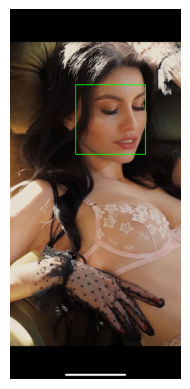

In [1]:
from helper import convert_and_trim_bb
import matplotlib.pyplot as plt
import imutils
import time
import dlib
import cv2

image_path = "../images/riana.jpeg"
model_file = "./mmod_human_face_detector.dat"
upsample = 1

# load dlib's CNN face detector
print("[INFO] loading CNN face detector...")
detector = dlib.cnn_face_detection_model_v1(model_file)

# load the input image from disk, resize it, and convert it from
# BGR to RGB channel ordering (which is what dlib expects)
image = cv2.imread(image_path)
image = imutils.resize(image, width=600)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# perform face detection using dlib's face detector
start = time.time()
print("[INFO[ performing face detection with dlib...")
results = detector(rgb, upsample)
end = time.time()
print("[INFO] face detection took {:.4f} seconds".format(end - start))

# convert the resulting dlib rectangle objects to bounding boxes,
# then ensure the bounding boxes are all within the bounds of the
# input image
boxes = [convert_and_trim_bb(image, r.rect) for r in results]

for (x, y, w, h) in boxes:
	# draw the bounding box on our image
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

